<h2>
Murphy Case - TripleTen  - Sprint 2 Project
Instacart Exploratory Data Analysis
    
Table of Contents <br><br>
<Li>	1. Duplicate Values
<Li>	2. Missing Values
<Li>	3. Easy Tasks
<Li>	4. Medium Tasks
<Li>	5. Hard Task

</h2> 
</div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#notes: days since last order is a float --> int; contains blanks = ''; 
filepath = r"C:\Users\andrae\OneDrive\Desktop\Python_Work\Tripleten_Lessons\Sprint_02_Project"
try:
    df_instacart_orders = pd.read_csv(f"{filepath}\\instacart_orders.csv", sep=';')
except:
    df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
    
#need to correct nulls before converting the float
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [3]:
#notes: join departments for department name; join aisle to get aisle name; contains blanks ("") in product_name
try:
    df_products = pd.read_csv(f"{filepath}\\products.csv", sep=';')
except:
    df_products = pd.read_csv('/datasets/products.csv', sep=';')

df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
#notes: no preprocessing needed
try:
    df_aisles = pd.read_csv(f"{filepath}\\aisles.csv", sep=';')
except:
    df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
#notes: code 21 = "missing" - potential null value
try:
    df_departments = pd.read_csv(f"{filepath}\\departments.csv", sep=';')
except:
    df_departments = pd.read_csv('/datasets/departments.csv', sep=';')

df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
#notes: many rows (show_counts=True); add_to_cart_order is a float --> int
try:
    df_order_products = pd.read_csv(f"{filepath}\\order_products.csv", sep=';')
except:
    df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
df_orders_dups = df_instacart_orders.duplicated()
print(f"There are {df_orders_dups.sum()} duplicate values in the instacart_orders data.")


There are 15 duplicate values in the instacart_orders data.


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_2am = df_instacart_orders.query("order_dow == 3 and order_hour_of_day == 2")
wednesday_2am

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [9]:
# Remove duplicate orders
df_instacart_orders = df_instacart_orders.drop_duplicates()
df_instacart_orders.reset_index(drop=True, inplace=True)
df_instacart_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [10]:
# Double check for duplicate rows
# There could be implicit duplicates, each order ID should be unique, so I will check those
print(f"The series object wednesday_2am contains {wednesday_2am['order_id'].duplicated().sum()} duplicate values.\n")

#Double checking entire df
print(f"The instacart_orders df contains {df_instacart_orders.duplicated().sum()} duplicate values.")

The series object wednesday_2am contains 15 duplicate values.

The instacart_orders df contains 0 duplicate values.


In [11]:
# Double check for duplicate order IDs only
df_instacart_orders['order_id'].duplicated().sum()

0

In the instacart_orders data, We have found 15 duplicate values and stored them in their own DataFrame. We then used this DataFrame to drop rows from the original read DateFrame by dropping rows where the index matched, and reset the indices. Then we  checked for implicit duplicates by confirming that each order_id was in fact unique as it is intended. Using a formatted string, We have displayed that there are in fact no duplicate values.

### `products` data frame

In [12]:
# Check for fully duplicate rows
df_products_dups = df_products.duplicated()
print(f"There are {df_products_dups.sum()} duplicate values in the \"products\" data.")

There are 0 duplicate values in the "products" data.


In [13]:
# Check for just duplicate product IDs
prod_dup_ids = df_products['product_id'].duplicated().sum()
prod_dup_ids

0

In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
# Going to permanently change these to lowercase
df_products['product_name'] = df_products['product_name'].str.lower()
prod_name_dups = df_products['product_name'].duplicated()

print(f"There are {prod_name_dups.sum()} total product name duplicates.\n")

df_products['product_name'].isna().sum() #most of the duplicate names are missing values. There are some non-blanks
                                         #that should be safe to remove. 

df_duplicate_prods_index_2 = df_products[prod_name_dups]
df_duplicate_prods_index_2.sample(20)

df_products[df_products['product_name'] == 'fruit cocktail in heavy syrup'] #we can see that product_id is unique, but name is not

There are 1361 total product name duplicates.



,product_id,product_name,aisle_id,department_id
14872,14873,fruit cocktail in heavy syrup,99,15
42570,42571,fruit cocktail in heavy syrup,99,15


In [15]:
# Check for duplicate product names that aren't missing
# Check for duplicate product names that aren't missing (that are not null values)
non_nulls_prod_name = df_products[df_products['product_name'].notna()]
#print(non_nulls_prod_name.head(50))
#print()

#subset product_name
non_nulls_dup_count = non_nulls_prod_name.duplicated(subset='product_name')

print(non_nulls_dup_count.sum()) #there are 104 non-null dups


#drop these 104 values
df_prod_dup_index = non_nulls_dup_count[non_nulls_dup_count].index #list of 104 indices
df_products = df_products.drop(index=df_prod_dup_index).reset_index()
print(df_products.shape) #prev 49694: 49694 - 49590 = 104, boom!
#print(df_products.info())

104
(49590, 5)


When looking at the products data, Originally there were no duplicate values. This was because the product_id column was still unique on the implicit duplicate product names; I then needed to analyze the product names. To begin, I convert them all to lowercase, to better catch the duplicates and removed all null values so those were not being caught. I was able to determine that there were 104 duplicate non-null product names with unique product ids, and therefore removed those 104 from the original database, and reset the indices.

### `departments` data frame

In [16]:
print(df_departments.duplicated().sum())
print()
print(df_departments['department'].unique())

0

['frozen' 'other' 'bakery' 'produce' 'alcohol' 'international' 'beverages'
 'pets' 'dry goods pasta' 'bulk' 'personal care' 'meat seafood' 'pantry'
 'breakfast' 'canned goods' 'dairy eggs' 'household' 'babies' 'snacks'
 'deli' 'missing']


There are no duplicate values or implicit duplicates. The data types are also correct so there is further processing is necessary.

### `aisles` data frame

In [17]:
print(f"There are {df_aisles.duplicated().sum()} duplicate values in the aisles dataset.")
print()
print(f"The number of duplicate values in the aisles column are {df_aisles['aisle_id'].duplicated().sum()}.")

There are 0 duplicate values in the aisles dataset.

The number of duplicate values in the aisles column are 0.


There are no duplicate values or implicit duplicates. The data types are also correct. No further processing is necessary. It should be noted that "other" is 6 and "missing" is 100.

### `order_products` data frame

In [18]:
# Check for fullly duplicate rows
df_order_products.duplicated().sum()

0

In [19]:
# Double check for any other tricky duplicates
#check individual columns
df_order_products.columns = ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

print(df_order_products[['order_id', 'product_id']].duplicated().sum())


0


In [20]:
df_order_products[['order_id', 'product_id']].sort_values(by=['order_id', 'product_id'])

,order_id,product_id
1420535,4,10054
2507695,4,17616
3977678,4,21351
1172585,4,22598
3189411,4,25146
...,...,...
719972,3421077,26940
4000108,3421077,27845
1505667,3421077,27966
4417991,3421077,45007


## Find and remove missing values


### `products` data frame

In [21]:
df_products.shape
df_products.columns

Index(['index', 'product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [22]:
# Are all of the missing product names associated with aisle ID 100?
# Are all of the missing product names associated with aisle ID 100?
missing_prods = df_products[df_products['product_name'].isna()]
print(missing_prods['aisle_id'].value_counts())

# We know from info() that there are 1,258 present null values. From our output here, it appears all of them are on ID 100.
# Check "other" category
other_prods = df_products[df_products['aisle_id'] == 6]
other_prods.sample(10)
#It appears the other category is not related to the nulls.

100    1258
Name: aisle_id, dtype: int64


,index,product_id,product_name,aisle_id,department_id
31736,31776,31777,sunscreen spf 50+,6,2
29078,29108,29109,h2o closer personal lubricant,6,2
43319,43392,43393,antibacterial hand soap,6,2
39450,39510,39511,baby diaper rash ointment,6,2
34360,34403,34404,facial mask age defying hydro serum,6,2
28491,28521,28522,coconut flour,6,2
39400,39460,39461,coffee mate french vanilla creamer packets,6,2
1654,1654,1655,moderate absorbency for women underwear large,6,2
23165,23185,23186,naturals flushable moist wipes tush wipes,6,2
1723,1723,1724,coconut lime frozen pop dairy free gluten free,6,2


In [23]:
# Are all of the missing product names associated with department ID 21?
print(f"Department ID 21 is: \"{df_departments.loc[20, 'department']}\"\n")
print(missing_prods['department_id'].value_counts())

# Based on our output each missing product name is associated with department 21 


Department ID 21 is: "missing"

21    1258
Name: department_id, dtype: int64


In [24]:
# What is this ailse and department?
print(f"Department ID 21 is: \"{df_departments.loc[20, 'department']}\"\n")
print(f"Aisle ID 100 is: \"{df_aisles.loc[99, 'aisle']}\"")

Department ID 21 is: "missing"

Aisle ID 100 is: "missing"


In [25]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

df_products.isna().sum()

index            0
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

We checked our work with isna. 

### `orders` data frame

In [26]:
df_instacart_orders.info()
df_instacart_orders['days_since_prior_order'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


array([30.,  9.,  2., 10., 17., 15., 22.,  4.,  8.,  3., 12., 11.,  7.,
        1.,  5.,  6., 14., nan, 20., 16., 24., 23., 27., 13.,  0., 28.,
       21., 25., 19., 18., 29., 26.])

In [27]:
# Are there any missing values where it's not a customer's first order?
not_first_order = df_instacart_orders[df_instacart_orders['order_number'] > 1]

missing_not_first_order = not_first_order['days_since_prior_order'].isna().sum()
print(missing_not_first_order)
print()

first_order = df_instacart_orders[df_instacart_orders['order_number'] == 1]
first_order.sample(10)

0



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
50905,720139,84511,1,4,13,NaN
187097,869668,149541,1,6,16,NaN
269148,1517359,51762,1,2,18,NaN
161596,465146,184346,1,6,13,NaN
175221,1047440,195462,1,0,19,NaN
29335,99058,41433,1,0,14,NaN
356339,2560380,154643,1,4,14,NaN
363422,1913995,171552,1,1,11,NaN
437378,2490741,30411,1,0,10,NaN
322894,186310,92968,1,6,1,NaN


THere are no null values when it is not a customers first order. We wont be able to convert to a float, however it is incorrect to remove all first order rows. The correct choice is to leave these nulls. It does not make sense to put another value. 



### `order_products` data frame

In [28]:
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [29]:
# What are the min and max values in this column?
max = df_order_products['add_to_cart_order'].max()
min = df_order_products['add_to_cart_order'].min()

print(f"The min of the column is {min}, and the max of the column is {max}")

The min of the column is 1.0, and the max of the column is 64.0


In [30]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_ids_w_miss = df_order_products[df_order_products['add_to_cart_order'].isna()]
#print(order_ids_w_miss.head(10))
order_ids_w_miss_filt = order_ids_w_miss['order_id'].unique()

len(order_ids_w_miss_filt) #70 different order ids w/ null values

70

In [31]:
# Do all orders with missing values have more than 64 products?
df_order_products[df_order_products['order_id'].isin(order_ids_w_miss_filt)].groupby('order_id').size().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64

<div class="alert alert-info">
<h4> Comments</h4>
<h4>Based off the code ran above we can see that there are multiple missing values with more than 64 products.</h4> 
</div>

In [32]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype('int')

df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


<div class="alert alert-info">
<h4> Comments</h4>

<h4>During this section, I made the decision to change the data type for the column 'add_to_cart_order' to integers which are better used when processing arithmetic functions. Having null/NA values can disrupt the arthmetic process so, it was advised to replace these values with 999, in which I can easily omit values with this response.</h4> 
</div>

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [33]:
sorted(df_instacart_orders['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [34]:
sorted(df_instacart_orders['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

### [A2] What time of day do people shop for groceries?

In [35]:
time_of_day = df_instacart_orders.groupby('order_hour_of_day')['order_id'].size()
time_of_day.sort_values(ascending=False).head()

order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
Name: order_id, dtype: int64

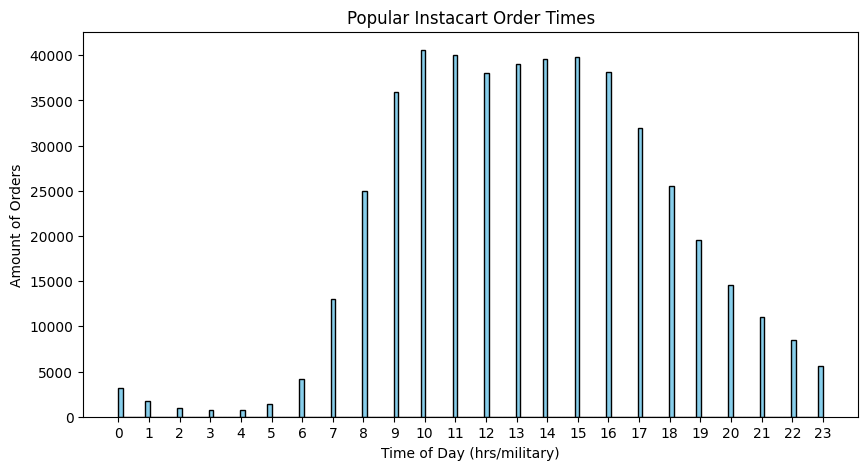

In [36]:
# Plot histogram of time_of_day Series data; Use Rice's Rule for bins: n=478,952
plt.figure(figsize=(10,5))

#I want nice labels for each hour - create them using loop
xtics = []
for i in range(24):
    xtics.append(i)
    
df_instacart_orders['order_hour_of_day'].plot(kind='hist',
                                              bins=156,
                                              color='skyblue',
                                              edgecolor='black',
                                              title='Popular Instacart Order Times')

plt.xlabel('Time of Day (hrs/military)')
plt.ylabel('Amount of Orders')
plt.xticks(xtics)
plt.show()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4> Comments</h4>

<h4>The most popular times are 10:00 and 3:00pm, however there is a slight dip at noon interestingly. Also worth noting that at the extreme times in the day (ie: early morning and late at night), is preferred over early in the morning.</h4> 
</div>


### [A3] What day of the week do people shop for groceries?

In [37]:
orders_by_day = df_instacart_orders.groupby('order_dow')['order_id'].size()
orders_by_day.sort_values(ascending=False).head()

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
Name: order_id, dtype: int64

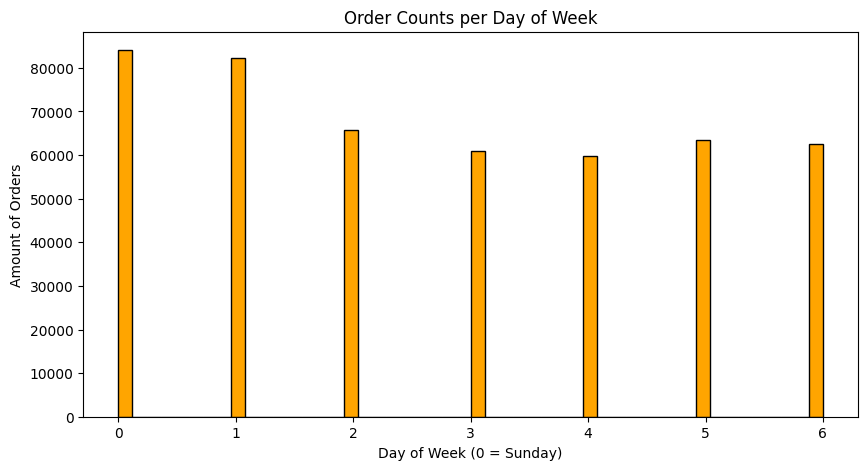

In [38]:
# Plot histogram of orders_by_day Series data; Use Rice's Rule for bins: n=478,952 - scaled back a bit for wider bars
plt.figure(figsize=(10,5))

#I want nice labels for each day - create them using loop
xtics = []
for i in range(7):
    xtics.append(i)
    
df_instacart_orders['order_dow'].plot(kind='hist',
                                      bins=50,
                                      color='orange',
                                      edgecolor='black',
                                      title='Order Counts per Day of Week')

plt.xlabel('Day of Week (0 = Sunday)')
plt.ylabel('Amount of Orders')
plt.xticks(xtics)
plt.show()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4> Comments</h4>

<h4>Previvouly we made the assumption that Wednesday is day 3, then 0 and 1 correspond to Sunday and Monday, respectively. So it seems that customers are buying groceries at the end of the weekend/start of the week to have food for the rest of the week.</h4> 
</div>

### [A4] How long do people wait until placing another order?

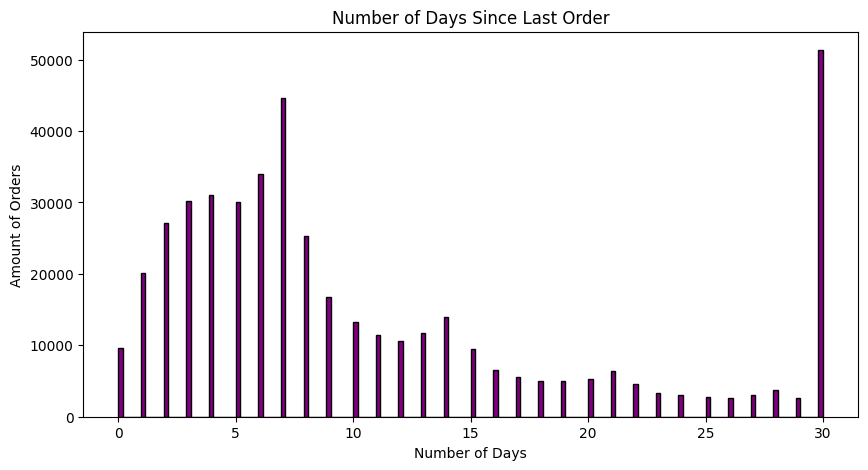

In [39]:
# Plot histogram of days_since_prior_order column; Use Rice's Rule for bins: n=478,952
plt.figure(figsize=(10,5))
    
df_instacart_orders['days_since_prior_order'].plot(kind='hist',
                                      bins=156,
                                      color='purple',
                                      edgecolor='black',
                                      title='Number of Days Since Last Order')

plt.xlabel('Number of Days')
plt.ylabel('Amount of Orders')
plt.show()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4> Comments</h4>

<h4>People tend to wait 8.67 days before opening the Instacart app and placing another order.

Analysis: On average people wait 8-9 days before placing another order. Thats a little over a week. This could help us futher understand our customer shoping behavior as well as their overall happiness with our company. IMO we'd like to shorten that window or pursue more cilents to fill in that void.</h4> 
</div>

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
# First I will define Wednesday and Saturday dfs
df_wed = df_instacart_orders.query("order_dow == 3")
df_sat = df_instacart_orders.query("order_dow == 6")

len(df_wed['order_hour_of_day'])

60897

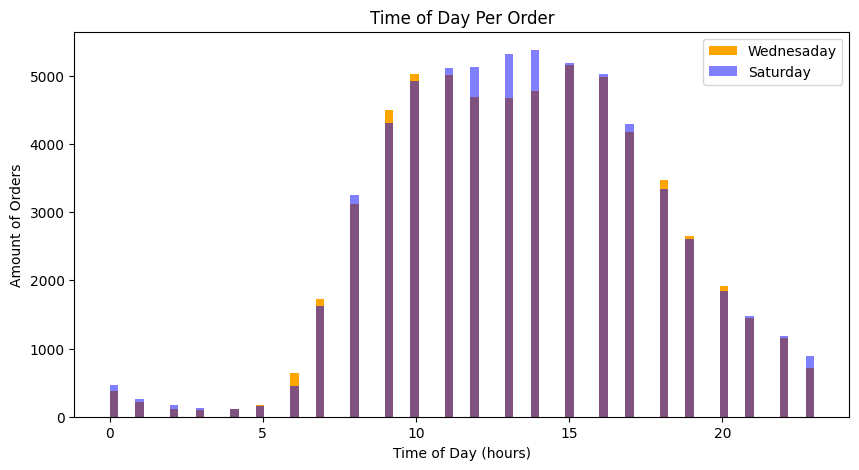

In [41]:
# Plot both on the same graph; using Rice's Rule for bin count; First set the size
plt.figure(figsize=(10,5))

df_wed['order_hour_of_day'].plot(kind='hist', bins=82, color='orange')
df_sat['order_hour_of_day'].plot(kind='hist', bins=82, alpha=0.5, color='blue')

#additional parameters
plt.legend(['Wednesaday', 'Saturday'])
plt.title('Time of Day Per Order')
plt.xlabel('Time of Day (hours)')
plt.ylabel('Amount of Orders')
plt.show()


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4> Comments</h4>

<h4>Based on our graph both days are pretty busy, however there are some subtle differences. Saturday is more active on the extremes of the graph: the early hours of the day (late nighters from Friday) and on the other end, late into the night on Saturday as well. Also, Saturday tends to hold steadier business throughout the morning into the afternoon, whereas Wednesday business dips at noon; which creates a nice peak, versus Wednesday's dip. One other takeaway here is that Saturday is a busier day for instacart employees, and a day of higher sales consequently, than Wednesday.</h4> 
</div>

### [B2] What's the distribution for the number of orders per customer?

In [42]:
# Group the orders by user and count the number of orders for each user
df_order_grp = df_instacart_orders.groupby('user_id')['order_id'].count().sort_values()

#157,437 users and 27 unique values of amount of orders

In [43]:
df_order_grp

user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64

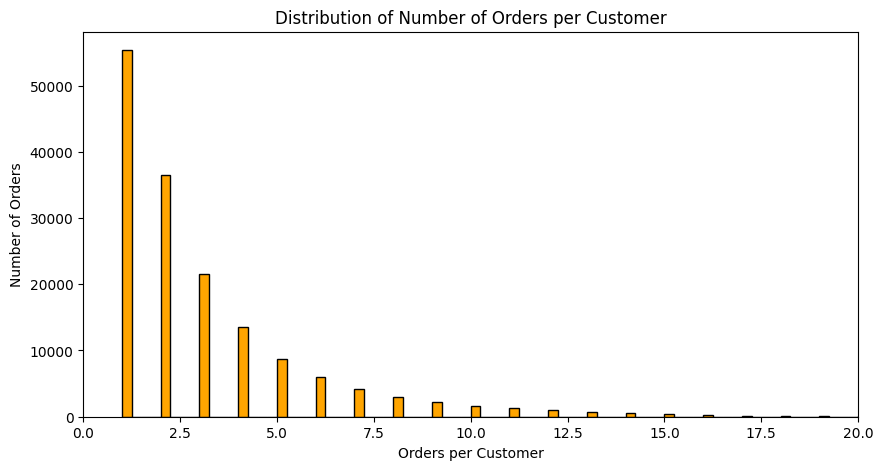

In [44]:
# Plot the histogram
plt.figure(figsize=(10,5))
df_order_grp.plot(kind='hist', 
                  bins=108, 
                  color='orange', 
                  #xlabel='Number of Orders',
                  xlim=(0,20),
                  title='Distribution of Number of Orders per Customer',
                  edgecolor='black')

plt.xlabel('Orders per Customer')
plt.ylabel('Number of Orders')
plt.show()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4>Comments</h4>
<h4>
Based on the above analysis, we can conclude the majority the customers in this dataset have 1 order. In addition, we can conclude a descending amount of customers have orders in access of 3 orders.
</h4> 
</div>

### [B3] What are the top 20 popular products (display their id and name)?

In [45]:
# Will need to merge order_products and products: inner join on product_id
merged_prods = pd.merge(df_order_products, df_products, on='product_id', how='inner')

In [46]:
print(merged_prods.shape) #looks correct

(4533739, 8)


In [47]:
grouped_prods = merged_prods.groupby(['product_id', 'product_name']).size().reset_index(name='count')
grouped_prods

,product_id,product_name,count
0,1,chocolate sandwich cookies,280
1,2,all-seasons salt,11
2,3,robust golden unsweetened oolong tea,42
3,4,smart ones classic favorites mini rigatoni wit...,49
4,7,pure coconut water with orange,2
...,...,...,...
45470,49684,vodka- triple distilled- twist of vanilla,1
45471,49685,en croute roast hazelnut cranberry,2
45472,49686,artisan baguette,24
45473,49687,smartblend healthy metabolism dry cat food,1


In [48]:
print(grouped_prods.shape)

(45475, 3)


In [ ]:
print()
merged_prods.sample(20) #join looks good

In [55]:
merged_prods_grp = merged_prods.groupby(['product_id', 'product_name'])['order_id'].count() #groupby the product, and count the orders
merged_prods_top_20 = merged_prods_grp.sort_values(ascending=False).reset_index().head(20)
merged_prods_top_20 = merged_prods_top_20.rename(columns={'product_id': 'Product ID', 'product_name': 'Product Name', 'order_id':'Order Count'})
merged_prods_top_20

,Product ID,Product Name,Order Count
0,24852,banana,66050
1,13176,bag of organic bananas,53297
2,21137,organic strawberries,37039
3,21903,organic baby spinach,33971
4,47209,organic hass avocado,29773
5,47766,organic avocado,24689
6,47626,large lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic whole milk,19600


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [ ]:
# Use the order_products data; group by order_id and count the number of products - then pull an average
prods_per_order = df_order_products.groupby('order_id')['product_id'].count()
#print(prods_per_order)

prods_per_order_avg = prods_per_order.sum() / len(prods_per_order)

#print(prods_per_order.describe())
print(f"There are typically {int(prods_per_order_avg)} products in anyone's Insta-cart!") 
#value was 10.09, using int here will round the value and not have a float in the output

In [ ]:
# Now create the distribution; data is already filtered so I will use that; Rice's Rule produced empty bins, adjusted on my own 
plt.figure(figsize=(10,5))
prods_per_order.plot(kind='hist',
                     bins=129,
                     color='blue',
                     edgecolor='black',
                     title='Number of Items per Order',
                     xlim=(0,55))

plt.xticks([2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50])
plt.xlabel('Number of Items')
plt.show()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4>Comments</h4>
<h4>
Based on our histogram for the number of items per order, we can see that the peak of this graph falls in the range from 4 to 12; which actually tells us something really interesting about user behavior. We can see that most people using instacart have smaller orders. A large percent of the orders have less than 20 items in it, and the average is only 10! That's usually the max amount allowed at a speed checkout, interesting.
</h4> 
</div>

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [ ]:
#filter order_products data down to just reorders
df_reorders_2 = df_order_products.query("reordered == 1")

#Now inner join the products table to get the names
product_merge_r = pd.merge(df_reorders_2, df_products, how='inner', on='product_id')

#Now obtain a count of the number of 1s per product
reorder_count = product_merge_r.groupby(['product_id', 'product_name'])['reordered'].count()

#print top 20 reorders
top_20_reorders = reorder_count.sort_values(ascending=False).head(20)
top_20_reorders

#now use reset_index to create a new column, rename columns, and clean up
top_20_reorders = top_20_reorders.reset_index()
top_20_reorders[['product_id', 'product_name']]
#top_20_reorders = top_20_reorders.rename(columns={'product_id': 'product_id', 'reordered': 'num_times_reordered'})

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4>Comments</h4>
<h4>
Above I have populated the Top 20 products which are reordered most frequently. Based on this list, we can better market these products to our customers and/or managing future pricing based on the historical demand. Within the top 20 , we can conclude the majority of high reorders (90%) are for Fruits and Vegetables.
</h4> 
</div>

### [C3] For each product, what proportion of its orders are reorders?

In [ ]:
#filter the order_products data down to just reorders
df_reorders = df_order_products.query("reordered == 1")
#print(df_reorders)

#determine the number of reorders for each product
num_reorders = df_reorders.groupby('product_id')['order_id'].count()
#print(num_reorders)

#Now obtain the number of orders per product_id
df_order_prod_total = df_order_products.groupby('product_id')['order_id'].count()

#calculate proportion
proport_reords = (num_reorders / df_order_prod_total)

#filter to match product ids in df_reorders
proport_reords = proport_reords[proport_reords.index.isin(df_reorders['product_id'])]

#reset the index to create a new df and rename columns then clean up
proport_reords = proport_reords.reset_index()
proport_reords = proport_reords.rename(columns={"product_id": "product_id", "order_id": "proportion_(%)"})
proport_reords['proportion_(%)'] = (proport_reords['proportion_(%)'] * 100).round(2).astype(str) + '%'

proport_reords

### [C4] For each customer, what proportion of their products ordered are reorders?

In [ ]:
# Use code from C3 as an outline; Need to start by merging instacart_orders with order_product
order_prods_merg = pd.merge(df_order_products, df_instacart_orders, on='order_id', how='left')

#filter this data down if necessary
order_prods_merg.info(show_counts=True) #It appears that all user_ids loaded in, yay!

In [ ]:
total_prods_per_user = order_prods_merg.groupby('user_id')['product_id'].count()
print(f"There are {len(total_prods_per_user.unique())} unique values in Total Products per User.")

num_reord_user = order_prods_merg.query("reordered == 1").groupby('user_id')['product_id'].count()
print(f"There are {len(num_reord_user.unique())} unique values in Total Products Reordered per User.\n")

proport_reord_user = num_reord_user / total_prods_per_user #not every user reorderd, in this case fill with 0
proport_reord_user = proport_reord_user.fillna(0)
#print(proport_reord_user.head())

#follow outline in C3
proport_reord_user = proport_reord_user.reset_index()
print(proport_reord_user.head())
proport_reord_user = proport_reord_user.rename(columns={"user_id": "user_id", "product_id": "proportion_(%)"})
proport_reord_user['proportion_(%)'] = (proport_reord_user['proportion_(%)']*100).round(2).astype(str) + '%'

proport_reord_user #would be interesting to plot this data

### [C5] What are the top 20 items that people put in their carts first? 

In [ ]:
# First grab all items put in carts first. I confirmed there is no item 0 with the code below
first_items = df_order_products.query("add_to_cart_order == 1")

# Now merge products to get product name
order_prods_merge = pd.merge(first_items, df_products, on='product_id', how='inner')
order_prods_merge

# Now we need to get the counts of the product_ids
product_counts_order = order_prods_merge.groupby(['product_id', 'product_name'])['add_to_cart_order'].count()
product_counts_order = product_counts_order.sort_values(ascending=False)
product_counts_order

#reset index and organize
product_counts_order = product_counts_order.reset_index()
product_counts_order[['product_id', 'product_name']].head(21)

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4>Comments</h4>
<h4>
Based on the data above, we can determine that a high number of customers go for healthier products first. Synonymous to the Top 20 reordered items, we can conculde most shoppers are reaching for Fruits and Vegetables during their visit.
</h4> 
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4>Comments</h4>
<h4>
Throughout this process, the analysis shows us the Top products that our consumers purchase and view. These products primarily consist of fruits and vegetables. We can use this information to better understand how to market these products to not only increase sales for them but draw our consumers into other possible purchases. When our consumers are using our services, they typically do so with orders that average about 10 items although there are the occasional people that use Instacart for larger orders. Looking at that analysis you can see that most of our consumers use Instacart in the same manner of someone who would be stopping in the store to grab a couple of items and utilizing the express checkout lane. Our customers use our services throughout the week, but you can see that later in the day on the weekends there are spikes. With fruits and vegetables being our most purchased products one could argue that our services are used to either stock up for late dinners or to restock for breakfast the next morning. This analysis gives our company lots of information which can be used in various departments to drive better business decisions. In some instances, we can use these results to push curtailed marketing to specific customer groups. Since we are able to see a high order of healthier options, we can create revenue opportunities and major impacts that require minimal price and volume changes YoY.
</h4> 
</div>